In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# parameters
L = 1000 # aquifer length, m
H = 10 # aquifer thickness, m
zb = -6 # aquifer bottom, m
k = 10 # hydraulic conductivity, m/d
n = 0.3 # porosity, -
T = k * H # transmissivity, m^2/d
h0 = 6 # specified head at the left boundary, m
hL = 4 # specified head at the right boundary, m

In [10]:
# solution
x = np.linspace(0, L, 100)
h = (hL - h0) * x / L + h0
Qx = - T * (hL - h0) / L * np.ones_like(x)

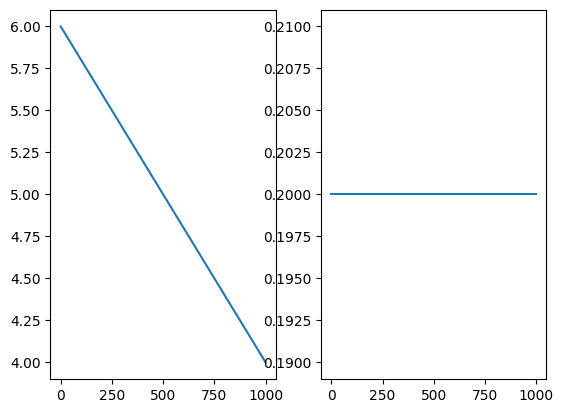

In [11]:
# basic plot
plt.subplot(121)
plt.plot(x, h)
plt.subplot(122)
plt.plot(x, Qx);

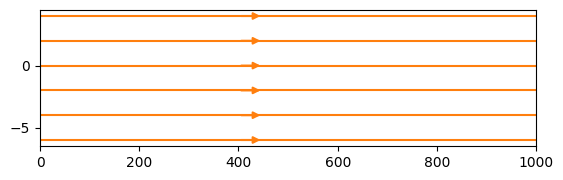

In [22]:
# solution
xg, zg = np.meshgrid(np.linspace(0, L, 2), np.linspace(zb, zb + H, 2))
qx = -k * (hL - h0) / L * np.ones_like(xg)
qz = np.zeros_like(xg)
# basic streamplot
plt.subplot(111, aspect=25)
plt.streamplot(xg, zg, qx, qz, color='C1', density=0.2);

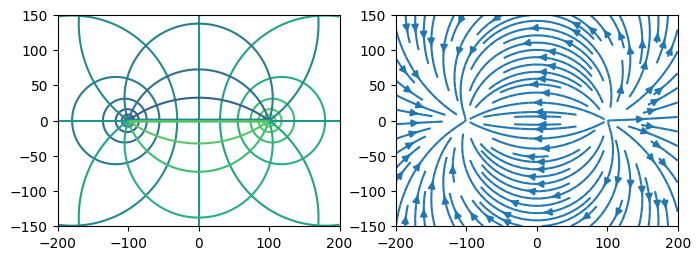

In [13]:
# parameters
T = 100 # transmissivity, m^2/d
hc = 0 # head at (0, 0)
d = 100 # half distance between the two wells, m
Q = [100, -100] # discharges of wells, m^3/d
xw = [-d, d] # x-locations of wells, m
yw = [0, 0] # y-locations of wells, m
phic = T * hc # discharge potential at origin, m^3/d
# solution
xg, yg = np.meshgrid(np.linspace(-200, 200, 100), np.linspace(-150, 150, 100))
pot = phic
psi = 0.0
Qx = 0.0
Qy = 0.0
for n in range(2):
    rsq = (xg - xw[n]) ** 2 + (yg - yw[n]) ** 2
    pot += Q[n] / (4 * np.pi) * np.log(rsq)
    psi += Q[n] / (2 * np.pi) * np.arctan2(yg - yw[n], xg - xw[n])
    Qx += -Q[n] / (2 * np.pi) * (xg - xw[n]) / rsq
    Qy += -Q[n] / (2 * np.pi) * (yg - yw[n]) / rsq
# basic plot
plt.figure(figsize=(8, 4))
plt.subplot(121, aspect=1)
plt.contour(xg, yg, pot, np.arange(phic - 100, phic + 100, 10))
plt.contour(xg, yg, psi, np.arange(-Q[0], Q[0], 10))
plt.subplot(122, aspect=1)
plt.streamplot(xg, yg, Qx, Qy);